# Family of Inhomogeneous Cosmological Einstein Rosen Metrics by Oliver and Verdaguer
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 11, 2022

http://diposit.ub.edu/dspace/bitstream/2445/24564/1/79608.pdf

We have not solved the wave equation as done in the paper.  Will go back and redo

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,x,y,z,dt,dx,dy,dz = symbols('t x y z dt dx dy dz')

In [4]:
f = Function('f')(t,z)
f

In [5]:
Phi = Function('Phi')(t,z)
Phi

In [6]:
variables = Matrix([t,x,y,z])
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,dx,dy,dz])
differentials 

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [8]:
lineElement = expand( f*(dz**2 - dt**2) + t * (exp(Phi)*dx**2 + exp(-Phi)*dy**2)) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡-f(t, z)      0            0          0   ⎤
⎢                                          ⎥
⎢             Φ(t, z)                      ⎥
⎢   0      t⋅ℯ              0          0   ⎥
⎢                                          ⎥
⎢                         -Φ(t, z)         ⎥
⎢   0          0       t⋅ℯ             0   ⎥
⎢                                          ⎥
⎣   0          0            0       f(t, z)⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡-f(t, z)      0            0          0   ⎤
⎢                                          ⎥
⎢             Φ(t, z)                      ⎥
⎢   0      t⋅ℯ              0          0   ⎥
⎢                                          ⎥
⎢                         -Φ(t, z)         ⎥
⎢   0          0       t⋅ℯ             0   ⎥
⎢                                          ⎥
⎣   0          0            0       f(t, z)⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂                                                                           ∂          ⎤  
⎢⎢──(f(t, z))                                                                 ──(f(t, z))⎥  
⎢⎢∂t                                                                          ∂z         ⎥  
⎢⎢───────────               0                               0                 ───────────⎥  
⎢⎢ 2⋅f(t, z)                                                                   2⋅f(t, z) ⎥  
⎢⎢                                                                                       ⎥  
⎢⎢             ⎛  ∂              ⎞  Φ(t, z)                                              ⎥  
⎢⎢             ⎜t⋅──(Φ(t, z)) + 1⎟⋅ℯ                                                     ⎥  
⎢⎢             ⎝  ∂t             ⎠                                                       ⎥  
⎢⎢     0       ────────────────────────────                 0                      0     ⎥  
⎢⎢                      2⋅f(t, z)                                     

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡   ⎛  ⎛  2              2         ⎞                        2                2⎞             
⎢ 2 ⎜  ⎜ ∂              ∂          ⎟           ⎛∂          ⎞    ⎛∂          ⎞ ⎟    2  2     
⎢t ⋅⎜- ⎜───(f(t, z)) - ───(f(t, z))⎟⋅f(t, z) + ⎜──(f(t, z))⎟  - ⎜──(f(t, z))⎟ ⎟ - t ⋅f (t, z
⎢   ⎜  ⎜  2              2         ⎟           ⎝∂t         ⎠    ⎝∂z         ⎠ ⎟             
⎢   ⎝  ⎝∂t             ∂z          ⎠                                          ⎠             
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                   2  2                    
⎢                                                                2⋅t ⋅f (t, z)              
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

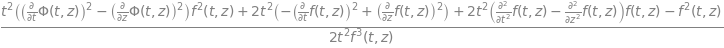

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡    ⎛                                    2              2                                  
⎢    ⎜             2                2    ∂              ∂                          2        
⎢    ⎜⎛∂          ⎞    ⎛∂          ⎞    ───(f(t, z))   ───(f(t, z))   ⎛∂          ⎞    ⎛∂   
⎢    ⎜⎜──(Φ(t, z))⎟    ⎜──(Φ(t, z))⎟      2              2            ⎜──(f(t, z))⎟    ⎜──(f
⎢    ⎜⎝∂t         ⎠    ⎝∂z         ⎠    ∂t             ∂z             ⎝∂t         ⎠    ⎝∂z  
⎢0.5⋅⎜────────────── - ────────────── + ──────────── - ──────────── - ────────────── + ─────
⎢    ⎜  2⋅f(t, z)        2⋅f(t, z)         2              2               3                3
⎢    ⎝                                    f (t, z)       f (t, z)        f (t, z)         f 
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡   ⎛  ⎛  2              2         ⎞                        2                2⎞             
⎢ 2 ⎜  ⎜ ∂              ∂          ⎟           ⎛∂          ⎞    ⎛∂          ⎞ ⎟    2  2     
⎢t ⋅⎜- ⎜───(f(t, z)) - ───(f(t, z))⎟⋅f(t, z) + ⎜──(f(t, z))⎟  - ⎜──(f(t, z))⎟ ⎟ - t ⋅f (t, z
⎢   ⎜  ⎜  2              2         ⎟           ⎝∂t         ⎠    ⎝∂z         ⎠ ⎟             
⎢   ⎝  ⎝∂t             ∂z          ⎠                                          ⎠             
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                   2  2                    
⎢                                                                2⋅t ⋅f (t, z)              
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [22]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                  ∂                                        
⎢                    2                     2   0.5⋅──(f(t, z))                              
⎢       ⎛∂          ⎞         ⎛∂          ⎞        ∂t            0.25                       
⎢- 0.25⋅⎜──(Φ(t, z))⎟  - 0.25⋅⎜──(Φ(t, z))⎟  + ─────────────── + ────                       
⎢       ⎝∂t         ⎠         ⎝∂z         ⎠       t⋅f(t, z)        2                        
⎢                                                                 t                         
⎢                                                                                           
⎢                                                                      ⎛       ⎛            
⎢                                                                      ⎜     2 ⎜  ⎛∂        
⎢                                                                      ⎜0.5⋅t ⋅⎜- ⎜──(Φ(t, z
⎢                                                                     

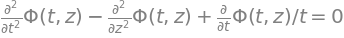

In [28]:
fieldEquation1 = Eq(expand((1/t)*ricciSimplified[1,1].args[2]),0)
fieldEquation1

In [50]:
dfdz = Eq( diff(f,z),solve( einsteinSimplified[3,0], diff(f,z) )[0] ) 
dfdz

In [51]:
dfdt = Eq( diff(f,t), expand( solve( einsteinSimplified[0,0], diff(f,t))[0] ) )
dfdt

In [52]:
vacuumFieldEquations = Matrix([fieldEquation1,dfdz,dfdt])
vacuumFieldEquations

⎡                                                   ∂                                   ⎤
⎢                       2              2            ──(Φ(t, z))                         ⎥
⎢                      ∂              ∂             ∂t                                  ⎥
⎢                     ───(Φ(t, z)) - ───(Φ(t, z)) + ─────────── = 0                     ⎥
⎢                       2              2                 t                              ⎥
⎢                     ∂t             ∂z                                                 ⎥
⎢                                                                                       ⎥
⎢                    ∂                       ∂           ∂                              ⎥
⎢                    ──(f(t, z)) = t⋅f(t, z)⋅──(Φ(t, z))⋅──(Φ(t, z))                    ⎥
⎢                    ∂z                      ∂t          ∂z                             ⎥
⎢                                                                                       ⎥
⎢         

In [38]:
X, Y = map(Function, 'XY')

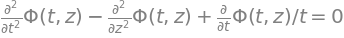

In [39]:
eq = vacuumFieldEquations[0]
eq

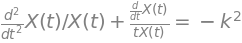

In [40]:
xODE = Eq(pde_separate( eq, Phi, [X(t),Y(z)])[0] , -k**2 ) 
xODE

In [41]:
xSolution = dsolve( xODE , X(t))
xSolution 

In [42]:
#  Here we arbitrarily set one of the Bessel functions equal to zero... fix this later
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],0)
xSolutionParticular

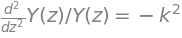

In [44]:
yODE = Eq( pde_separate( eq, Phi, [X(t),Y(z)])[1] ,  -k**2 ) 
yODE

In [46]:
ySolution = dsolve( yODE , Y(z))
ySolution 

In [47]:
#  Here we arbitrarily set cos equal to zero... fix this later
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],0).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

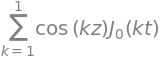

In [48]:
#  We'll keep just one term 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) )

In [54]:
phiOneTerm = Eq(Phi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) ).doit() ) 
phiOneTerm

In [55]:
dfdt.subs(phiOneTerm.lhs,phiOneTerm.rhs)

In [56]:
dfdt.subs(phiOneTerm.lhs,phiOneTerm.rhs).doit()

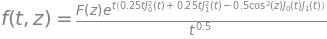

In [57]:
integratefWRTt = pdsolve( dfdt.subs(phiOneTerm.lhs,phiOneTerm.rhs).doit() )
integratefWRTt 

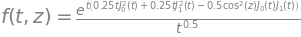

In [63]:
fWRTtSol = integratefWRTt.subs(integratefWRTt.args[1].args[1],1)
fWRTtSol

In [65]:
dfdz.subs(phiOneTerm.lhs,phiOneTerm.rhs)

In [66]:
integratefWRTz = pdsolve(dfdz.subs(phiOneTerm.lhs,phiOneTerm.rhs))
integratefWRTz

In [72]:
fWRTzSol = integratefWRTz.subs(integratefWRTz.args[1].args[0],1)
fWRTzSol